In [4]:
import torch
import torchvision #Contains neural network training datasets
from torchvision import transforms, datasets

In [5]:
#Defining the two major datasets: training and testing

#transforms.ToTensor convers data to a tensor, not already available as a tensor
train = datasets.MNIST("",train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("",train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw

Processing...


C:\Users\loyle\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [6]:
#Loading the data into another object that lets us iterate over it

trainset = torch.utils.data.DataLoader(train, batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10,shuffle=True)

#About the dataset: MNIST is a hand-written numbers dataset from 0 to 9, 28x28 image of the dataset.
#Batch size: how many samples/items we want to pass at a time to our model. Model will be optimized in tiny increments.
#            Commonly 8 to 64. If we used all of the data at once, the machine might learn some generalizations but some
#            weights might be more arbitrary and may not be generalizable.
#Shuffle: If the data were fed to the machine in order, it would decide "everything is a 0" when it sees the zeros or
#            "everything is a 9" when it reaches the 9. Shuffling helps with the generalization of the dataset. Minimizes
#            overfitting and cutting corners


In [7]:
#Iterating over the data

for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [9]:
#Accessing the 0th tensor and then the 0th image; 1st tensor and 1st image

x,y = data[0][0], data[1][0]
print(y)

tensor(8)


torch.Size([1, 28, 28])


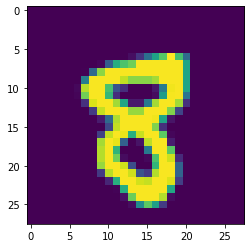

In [14]:
import matplotlib.pyplot as plt

print(data[0][0].shape)
#The valid shape for an image needs to be something like [28,28]
#plt.imshow(data[0][0]) #Throws an error because it's not the right shape
plt.imshow(data[0][0].view(28,28)) #Shows an 8!

In [17]:
#Balancing the dataset

#as.optimizer tries to create loss as easily as possible as much as possible. An imbalanced dataset will make the model
#adjust weights towards the majority dataset to minimize loss--> gets stuck and can't get out of the hole without an increse
#in loss. 

total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] +=1
        total+=1
        

print(counter_dict)



{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [18]:
#Looking at percentage distribution: what percent does each number make up of the total dataset? Result: relatively balanced
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001
